**About this file**
This data was gathered during last year's campaign.

**Data description is as follows:**

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Loading Data

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/home/ilaf/Desktop/ML projects/superstoreMarketingCampaign/dataSource/superstore_data.csv")

In [3]:
data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0


In [4]:
data.shape

(2240, 22)

# Data Preprocessing

 - Since "id" column is not useful we will drop it

In [5]:
data.drop(columns='Id', inplace=True)

In [6]:
data.shape

(2240, 21)

In [7]:
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0


In [8]:
data.describe(include = 'all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,8/31/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000


- As per primary exploratin, there are few columns which may need changes.

In [9]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [10]:
data["Income"] = data["Income"].fillna(np.mean(data["Income"]))

In [11]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

- Null values are filled. 

In [12]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [13]:
data['Response']= data['Response'].astype('str')

In [14]:
data['Response'] = data['Response'].replace(['1'], 'Accept')
data['Response'] = data['Response'].replace(['0'], 'Refuse')

In [15]:
data['Complain']= data['Complain'].astype('str')
data['Complain'] = data['Complain'].replace(['1'], 'Yes')
data['Complain'] = data['Complain'].replace(['0'], 'No')

In [16]:
data['Kidhome']= data['Kidhome'].astype('str')

In [17]:
data['Teenhome']= data['Teenhome'].astype('str')

In [18]:
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,Accept,No
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,Accept,No
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,Refuse,No
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,Refuse,No
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,Accept,No
5,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,Accept,No
6,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,Accept,No
7,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,Refuse,No
8,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,Refuse,No
9,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,Refuse,No


In [19]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                 object
Teenhome                object
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                object
Complain                object
dtype: object

In [20]:
categorical_cols, numerical_cols = [], []
for col in data.columns:
    if data[col].dtypes == "object":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [21]:
categorical_cols, len(categorical_cols)

(['Education',
  'Marital_Status',
  'Kidhome',
  'Teenhome',
  'Dt_Customer',
  'Response',
  'Complain'],
 7)

In [22]:
numerical_cols, len(numerical_cols)

(['Year_Birth',
  'Income',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth'],
 14)

In [23]:
for col in categorical_cols:
    print(data[col].value_counts())


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
8/31/2012    12
12/9/2012    11
2/14/2013    11
12/5/2014    11
8/20/2013    10
             ..
5/9/2012      1
9/11/2013     1
5/16/2013     1
7/20/2013     1
1/9/2012      1
Name: Dt_Customer, Length: 663, dtype: int64
Refuse    1906
Accept     334
Name: Response, dtype: int64
No     2219
Yes      21
Name: Complain, dtype: int64


In [24]:
data['Dt_Customer'] = data['Dt_Customer'].str[-4:]

In [25]:
for col in categorical_cols:
    print(data[col].value_counts())


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64
Refuse    1906
Accept     334
Name: Response, dtype: int64
No     2219
Yes      21
Name: Complain, dtype: int64


# Exploratory Data Analysis

# **Univariate Analysis**

In [26]:
data["Education"].value_counts().index

Index(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], dtype='object')

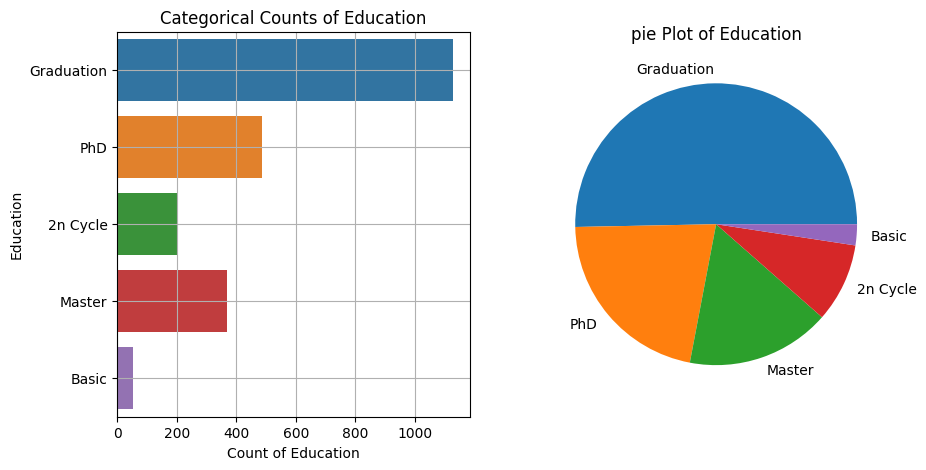

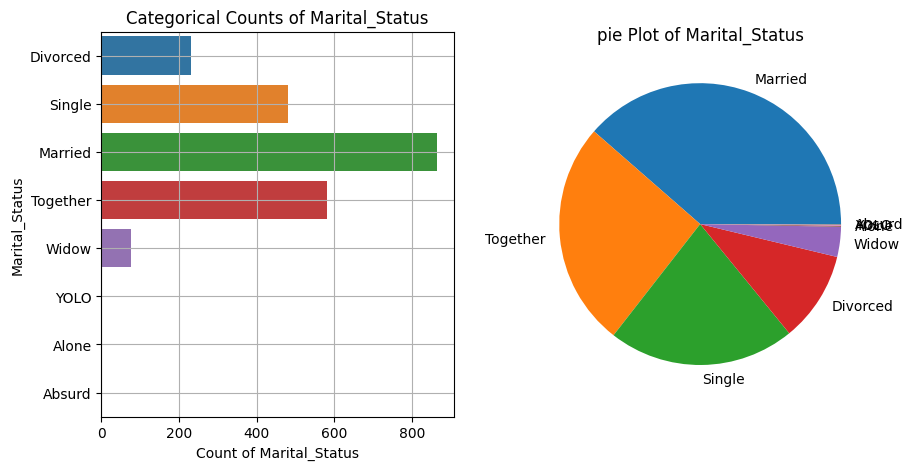

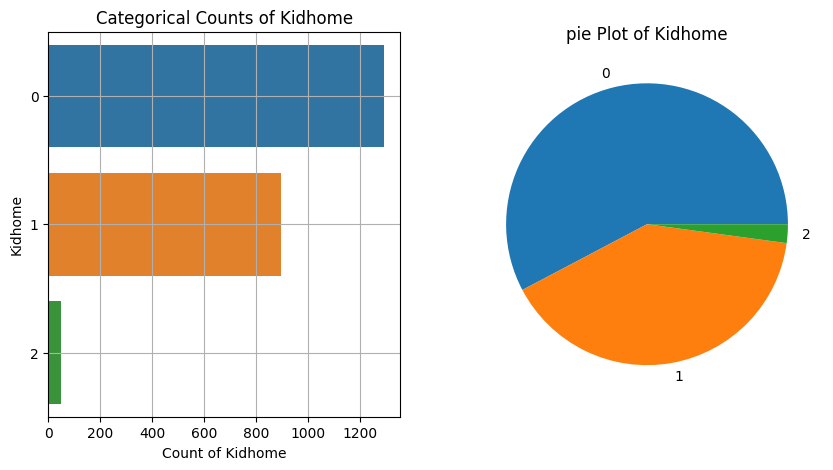

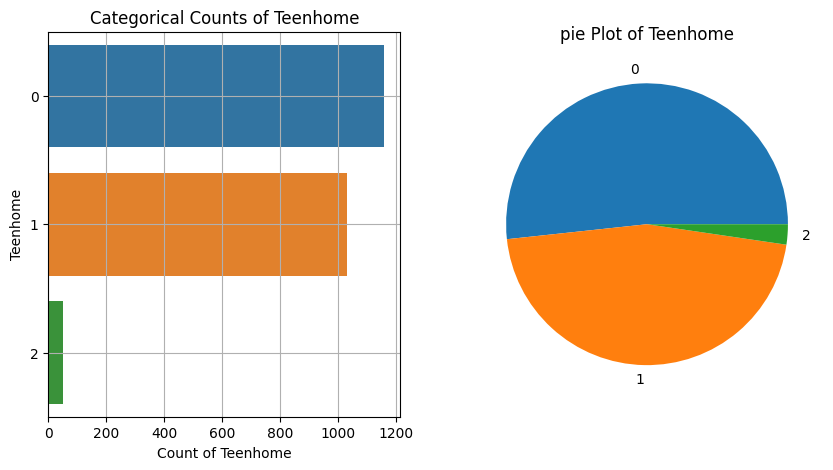

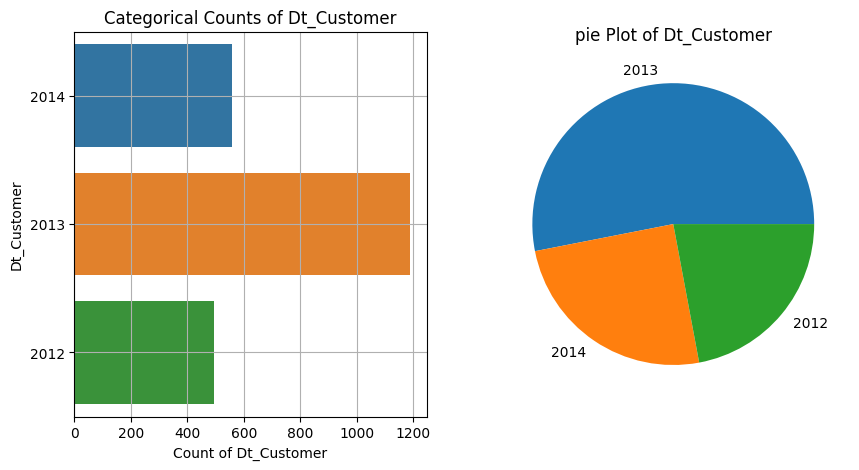

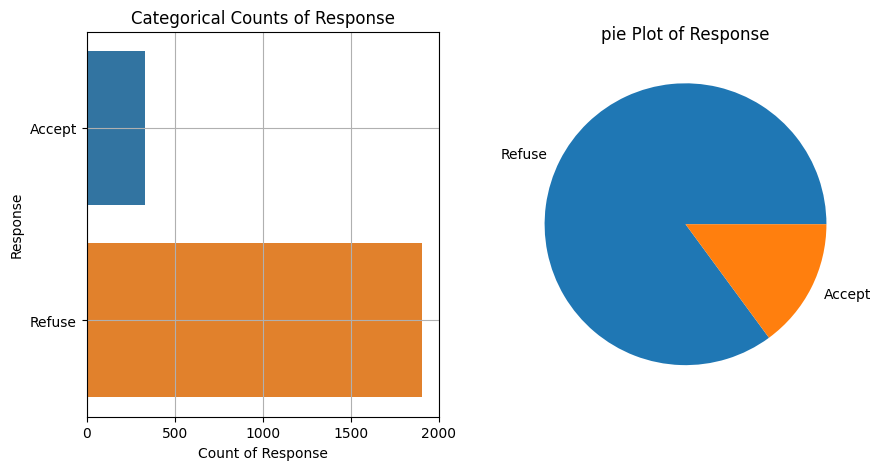

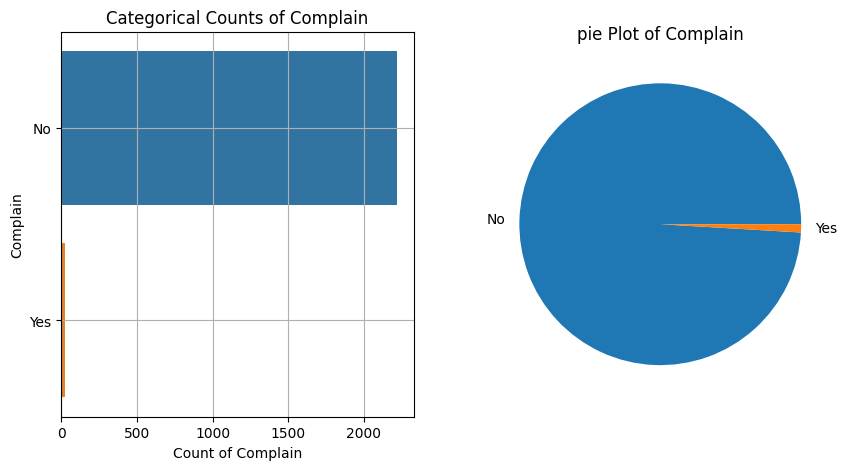

In [27]:
for col in categorical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    mylabels = data[col].value_counts().index
    plt.pie(data[col].value_counts(), labels = mylabels)
    plt.grid()
    plt.show()

- Most of the people have "Graduation" as their Education.
- Majority of people are "Married"
- "yolo","alone","absurd" have no signicant value
- Majority of customer enrolled in 2013
- Response given by customer was mostly refusal.
- Mostly there were no complaints for last 2 years. 
- Majority of customers have 0 kids and teens.

In [28]:
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Together'], 'Married')

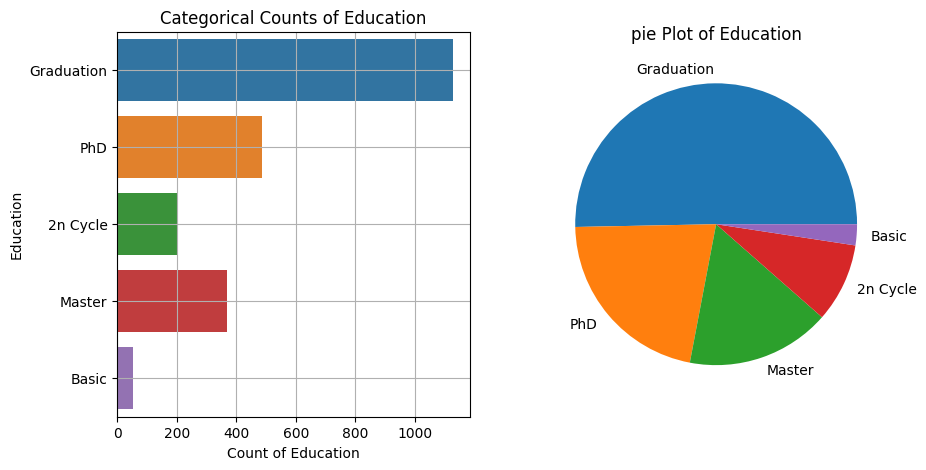

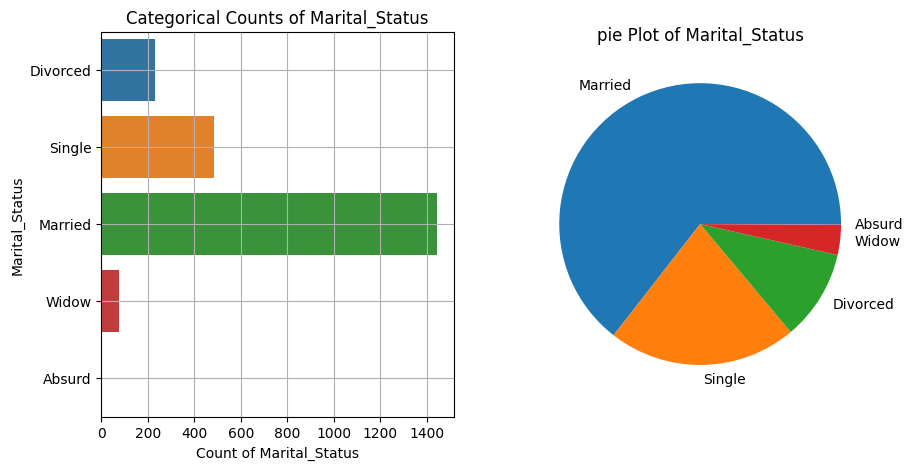

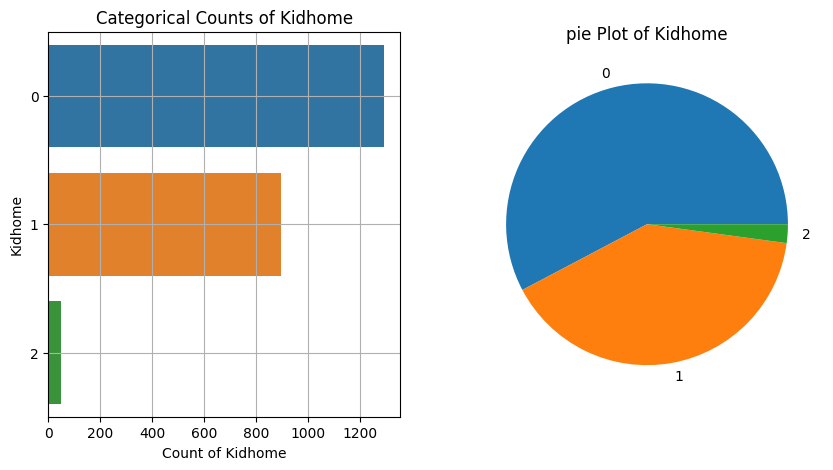

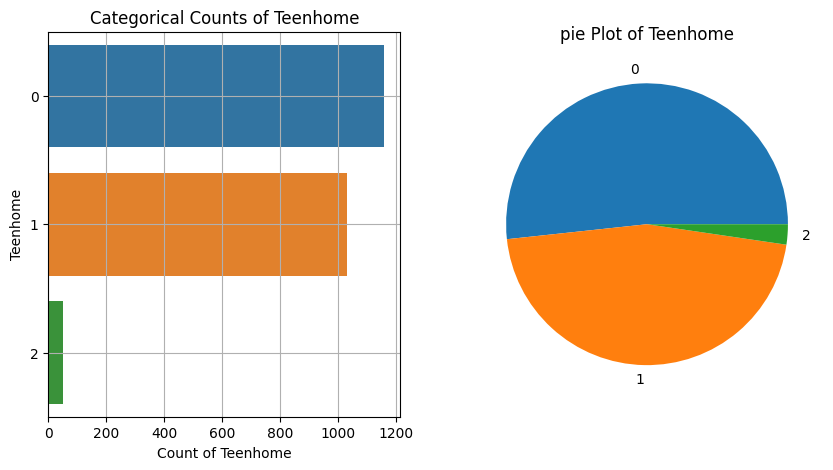

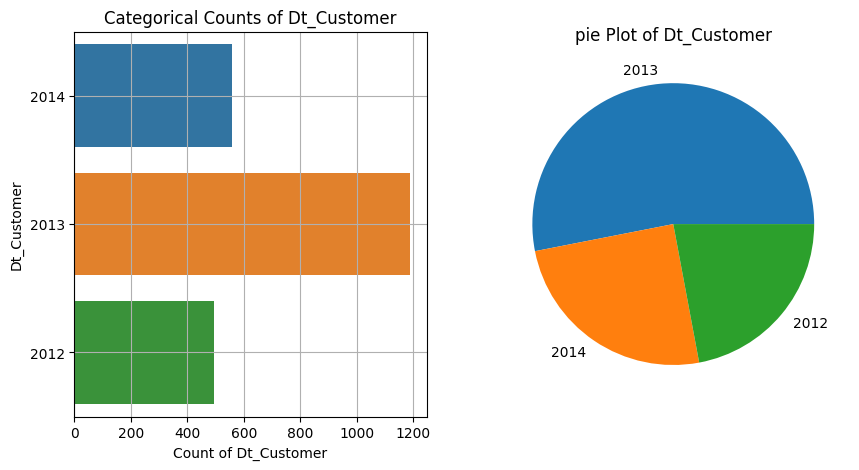

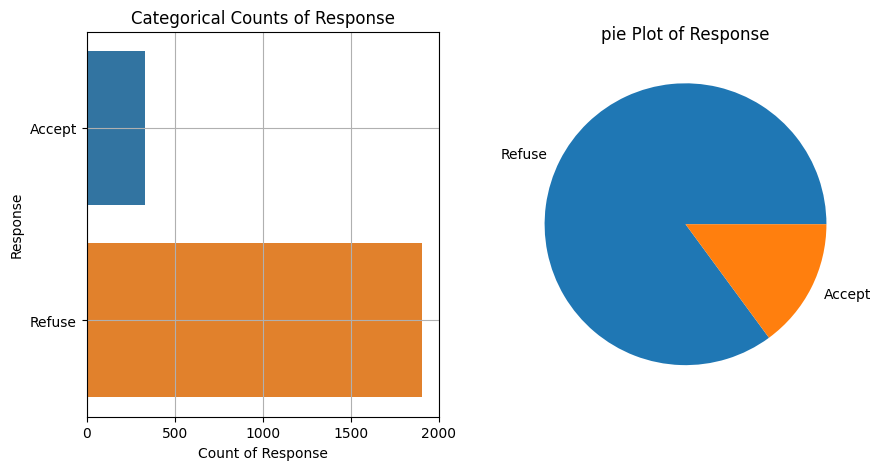

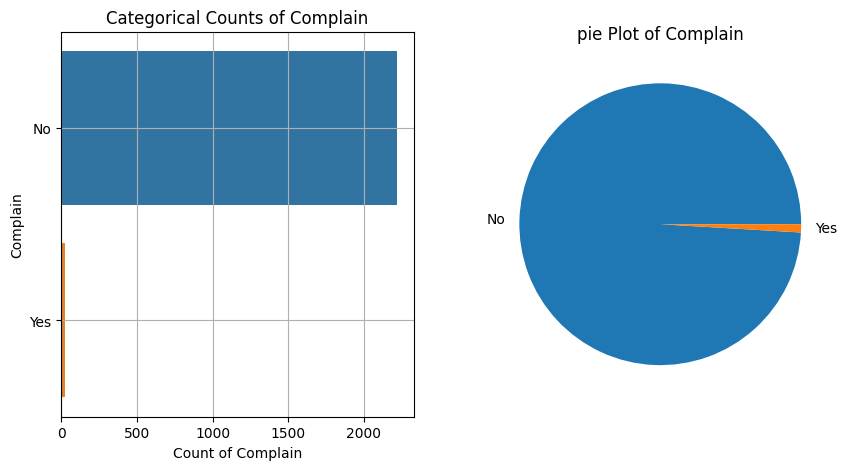

In [29]:
for col in categorical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    mylabels = data[col].value_counts().index
    plt.pie(data[col].value_counts(), labels = mylabels)
    plt.grid()
    plt.show()

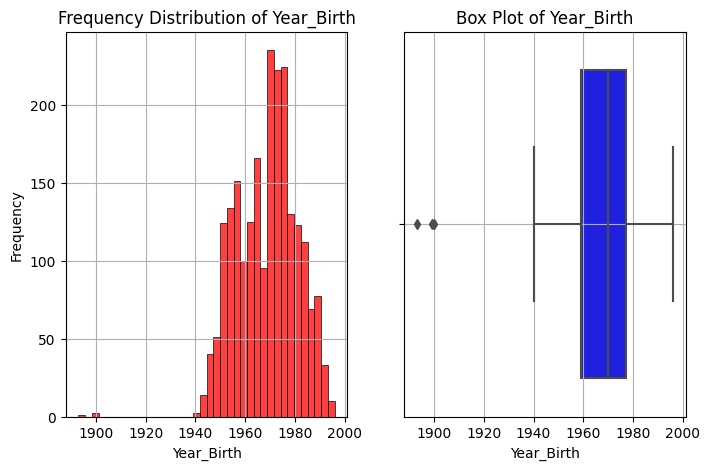

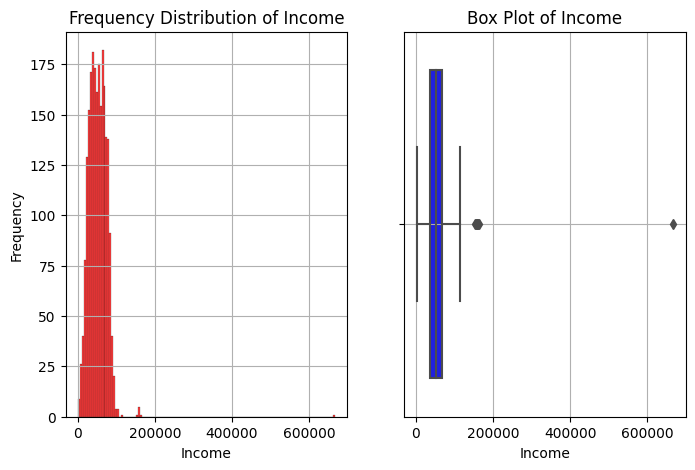

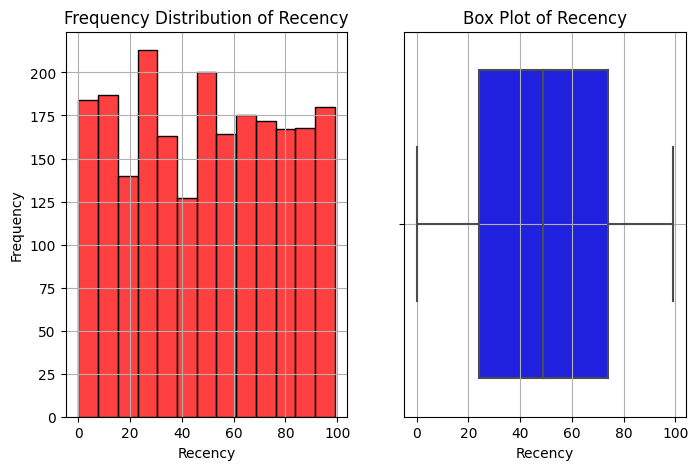

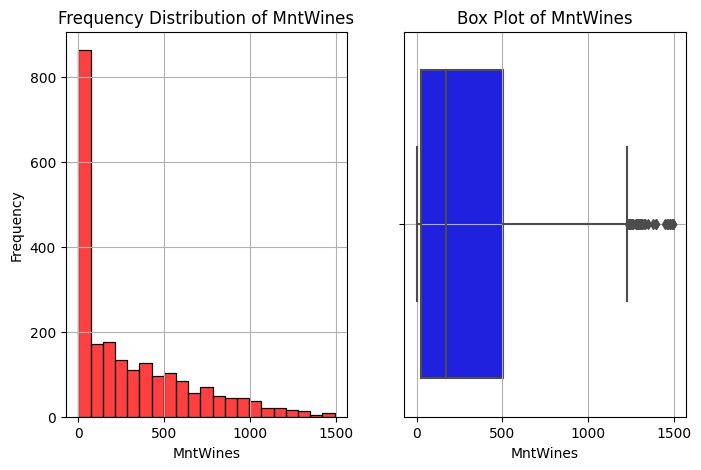

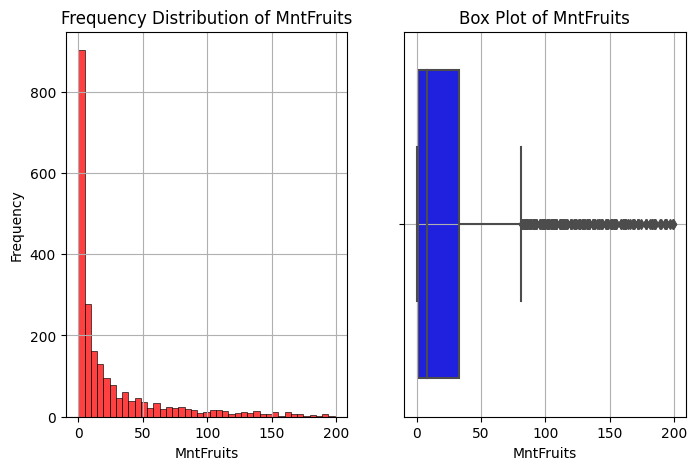

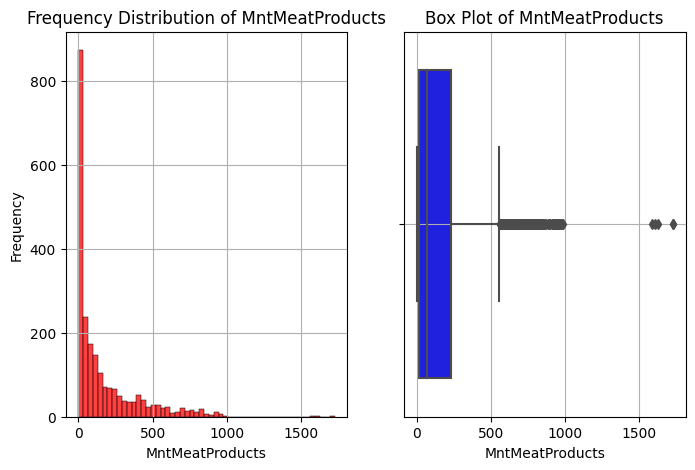

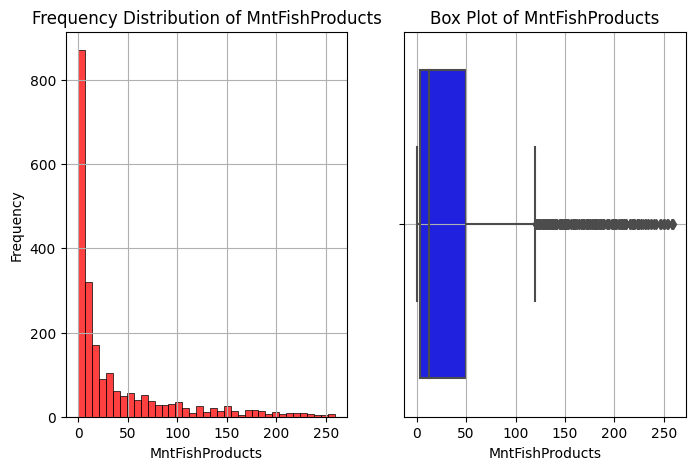

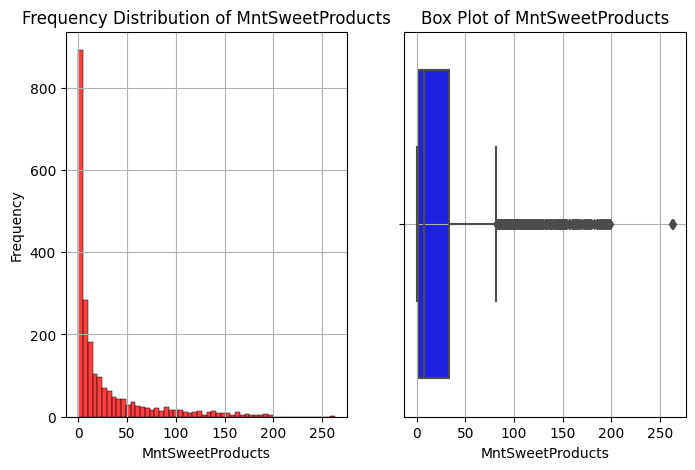

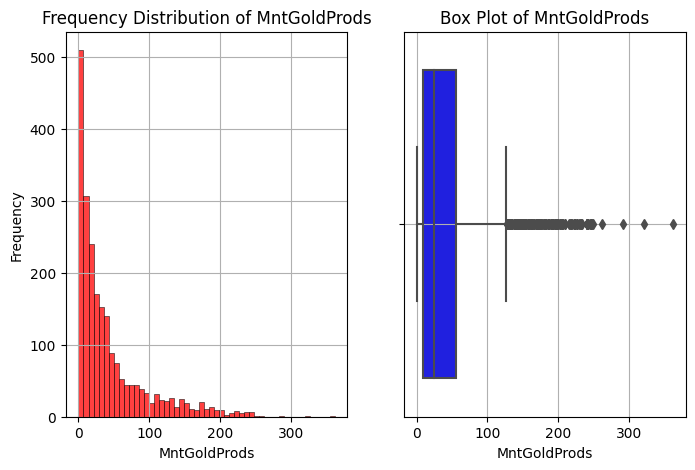

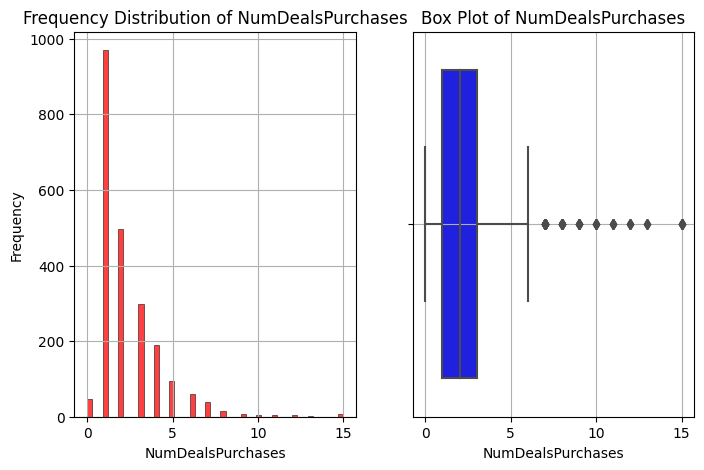

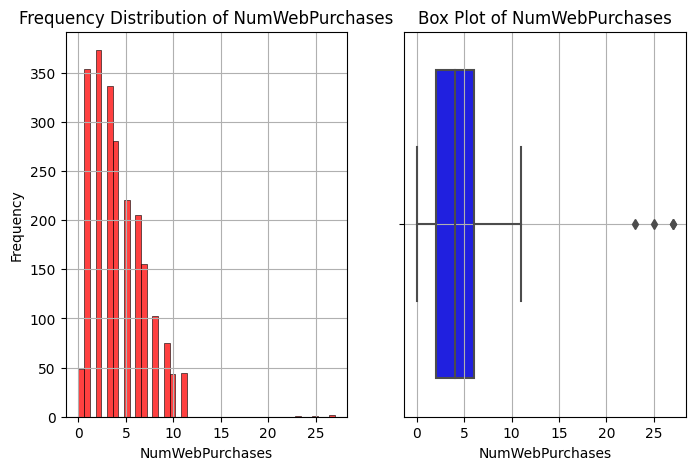

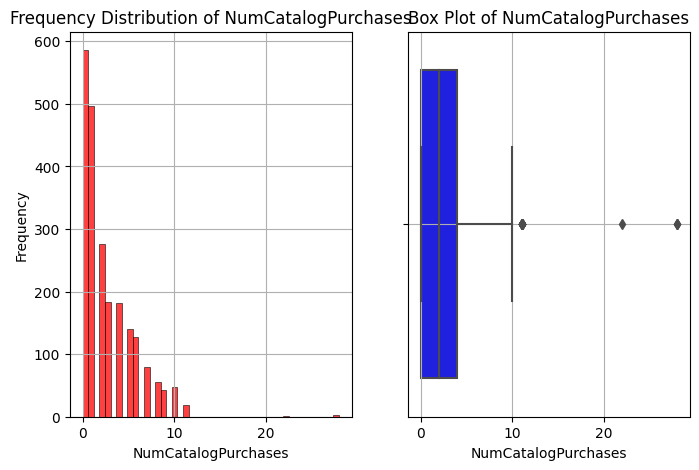

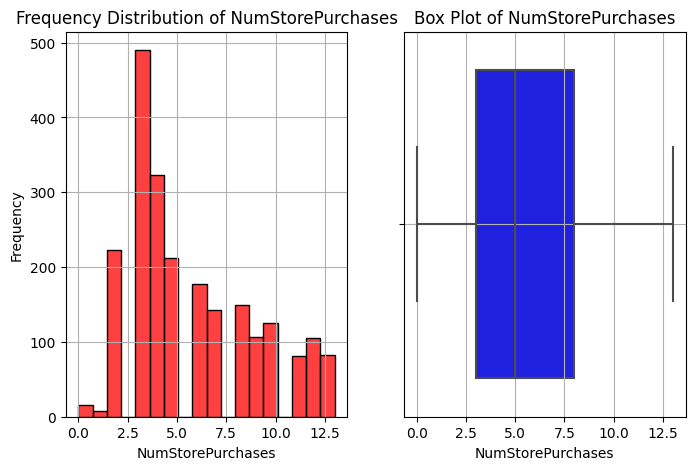

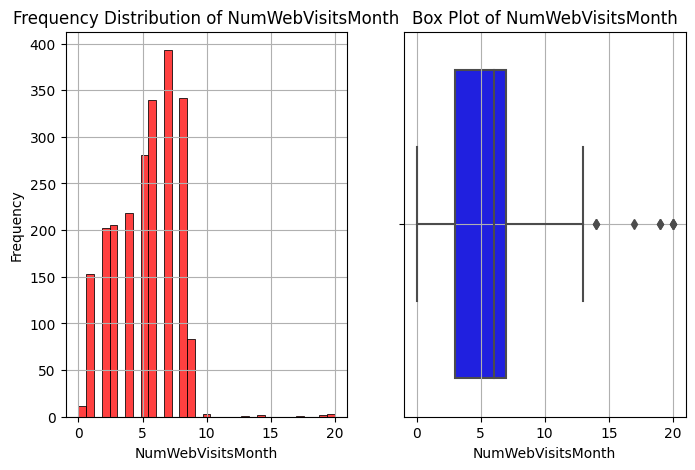

In [30]:
for col in numerical_cols:
    plt.figure(figsize = [8,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    sns.histplot(data = data, x = col, color = "red", cbar = True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    sns.boxplot(data = data, x = col, color = "blue")
    plt.grid()
    plt.show()

- Most of columns have right-skewed distribution.
- Columns showing normal distribution also have outliers.

# Multivariate analysis.

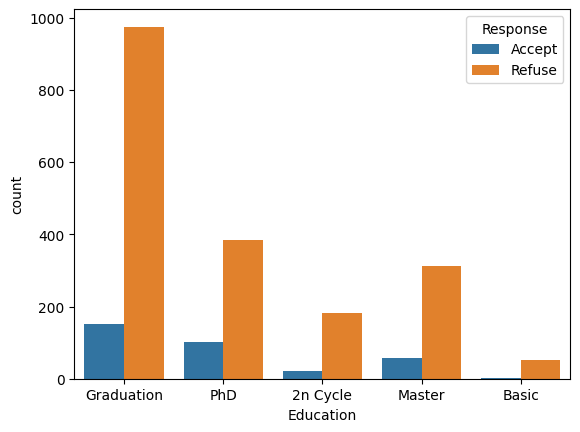

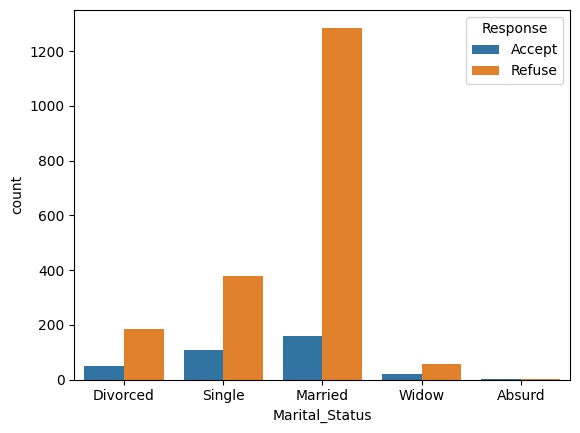

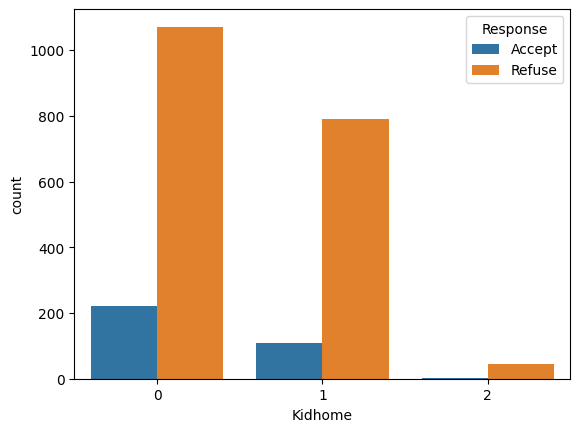

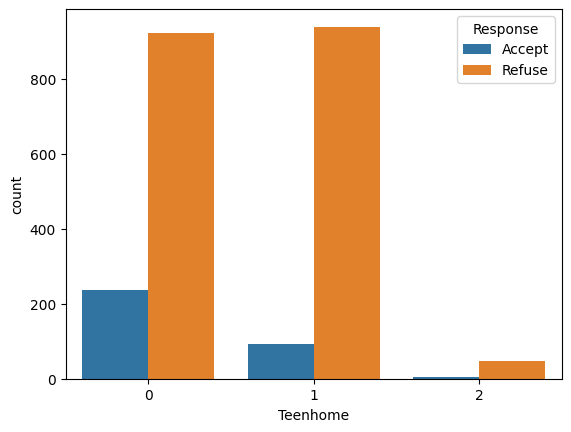

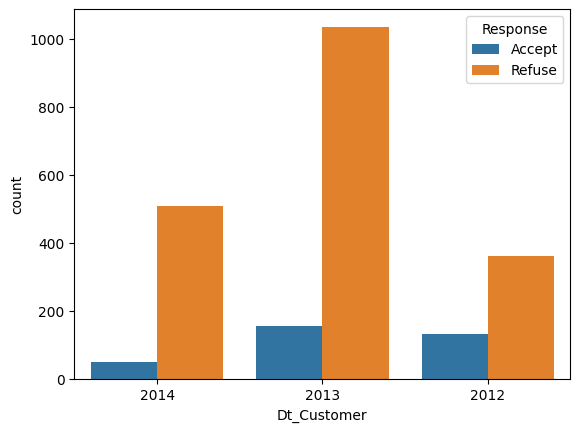

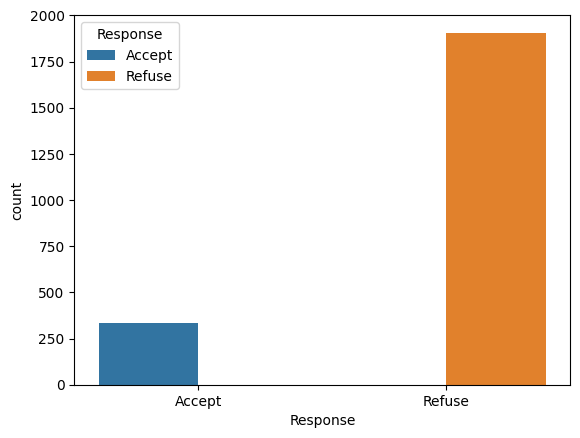

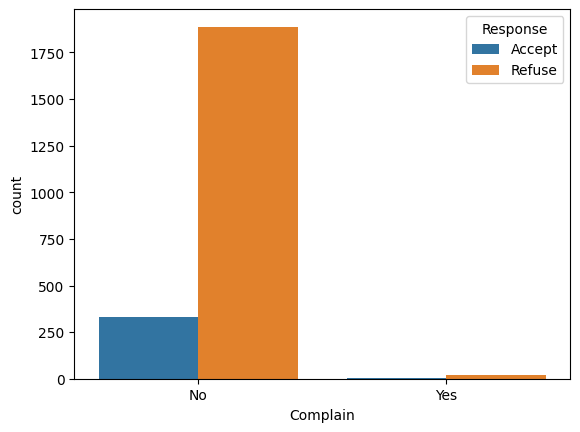

In [31]:
for col in categorical_cols:
    sns.countplot(x=col, hue='Response', data=data)
    plt.show()

- Most of the categories in different columns is showng refusal as response.


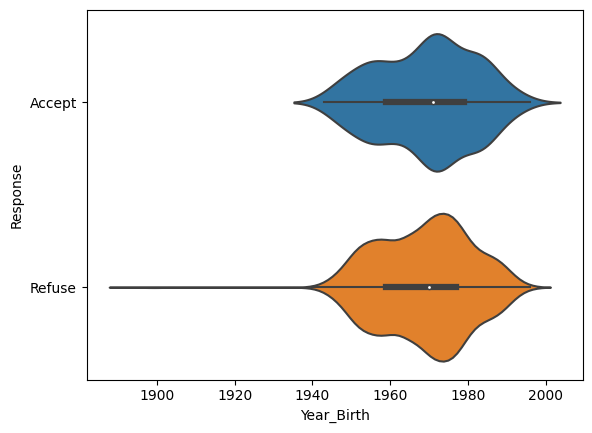

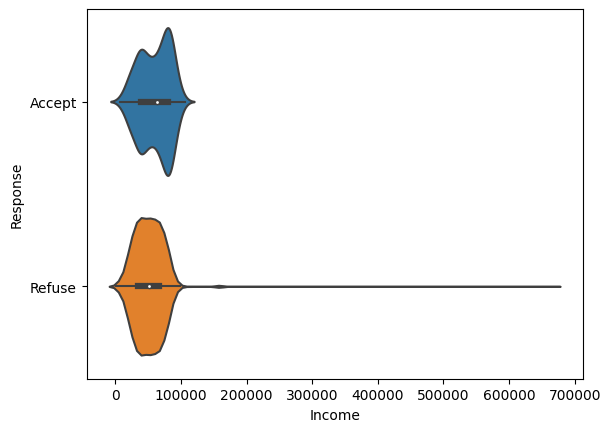

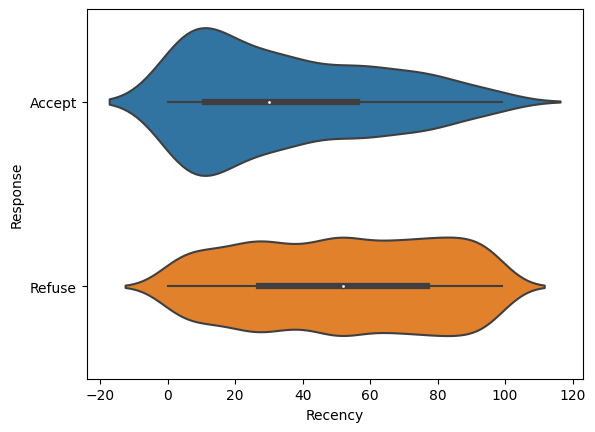

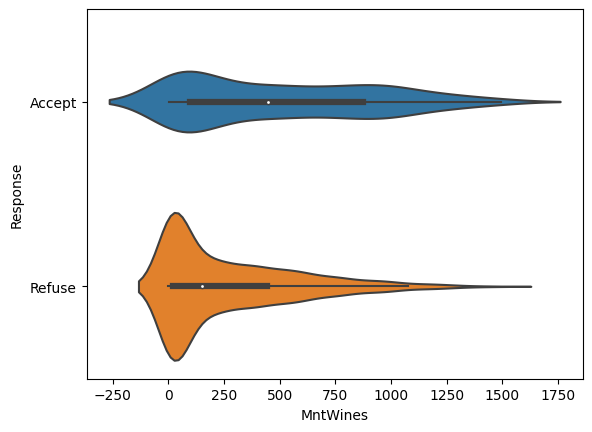

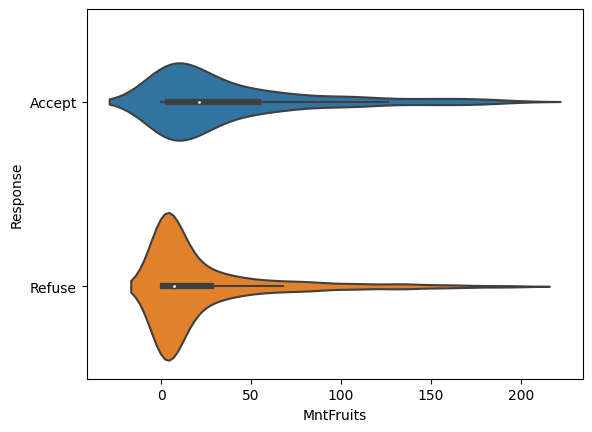

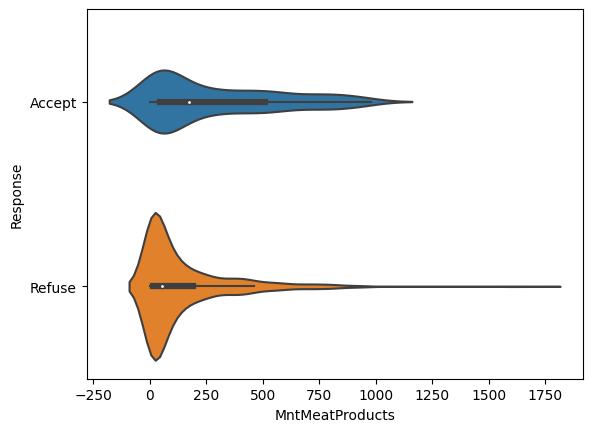

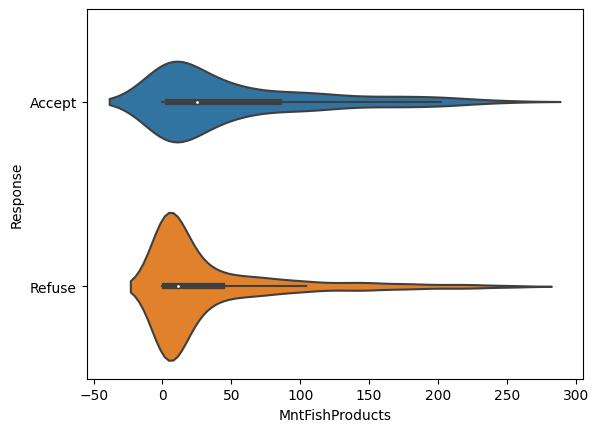

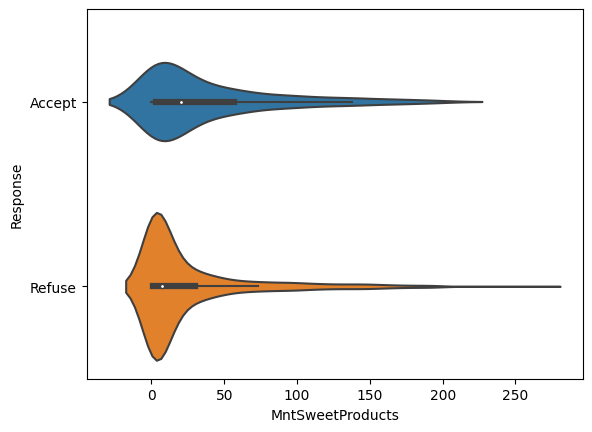

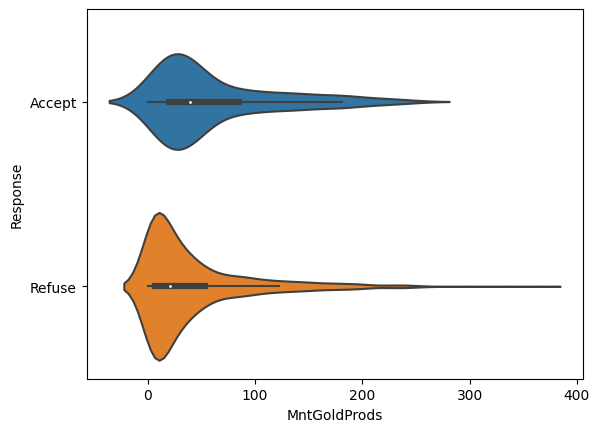

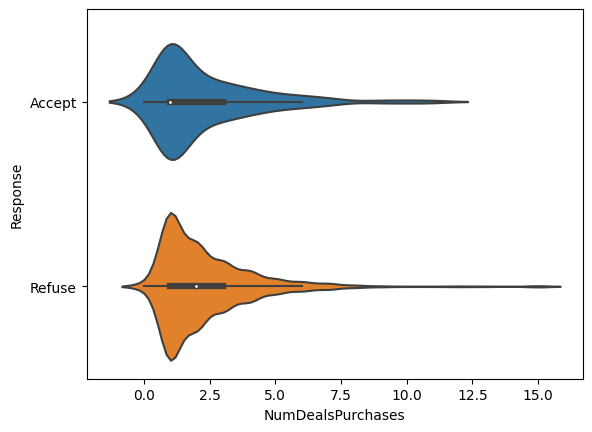

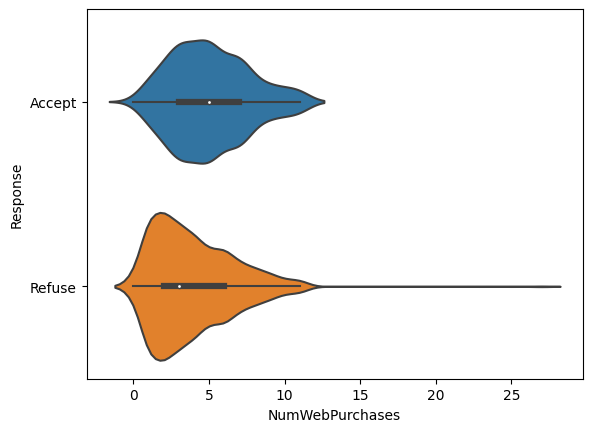

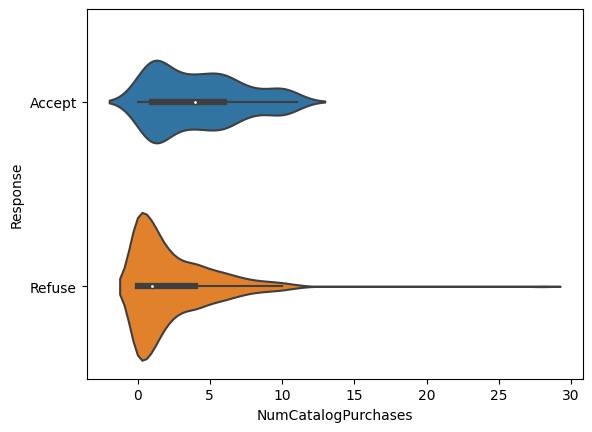

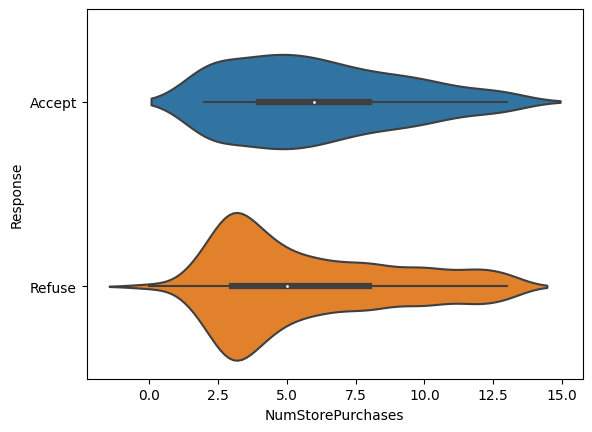

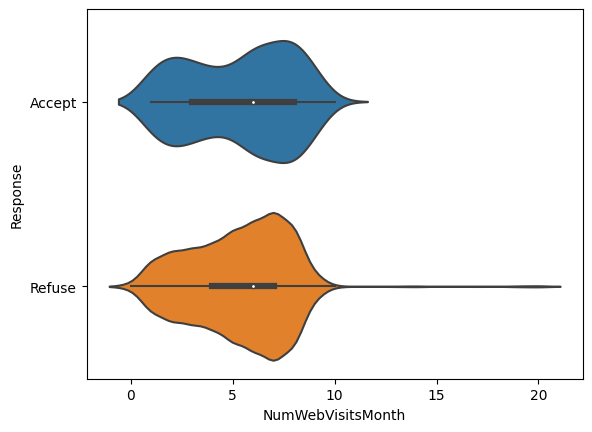

In [32]:
for col in numerical_cols:
    sns.violinplot(x=col, y='Response', data=data)
    plt.show()

In [33]:
featurs_list=['Education','Marital_Status','Kidhome','Teenhome','Complain']
featurs2_list=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
featurs3_list=['MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']


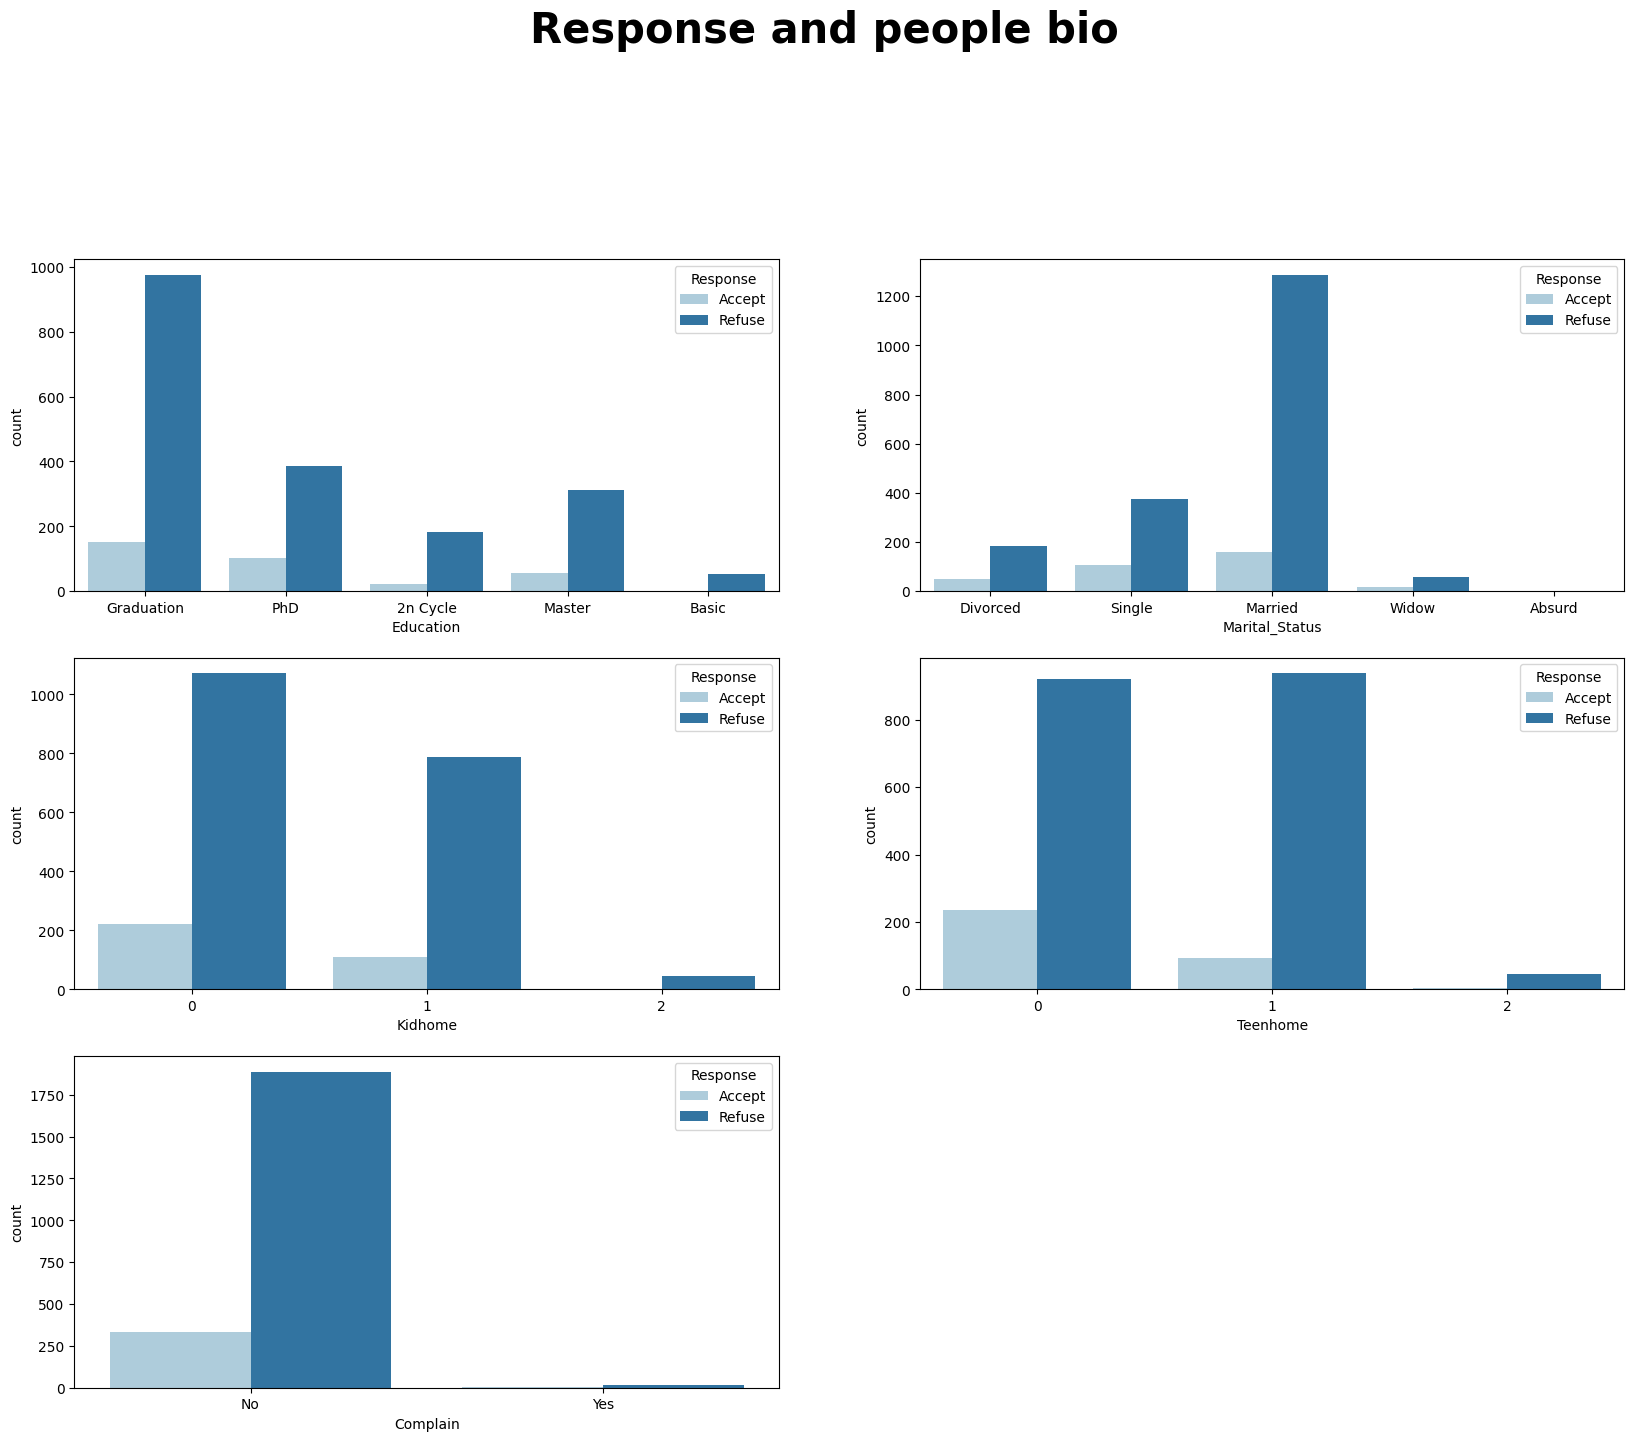

In [34]:
plt.figure(figsize = (20, 25))
plt.suptitle("Response and people bio",fontweight="bold", fontsize=30)
for i in range(len(featurs_list)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = featurs_list[i], hue = 'Response', palette = 'Paired', data = data)

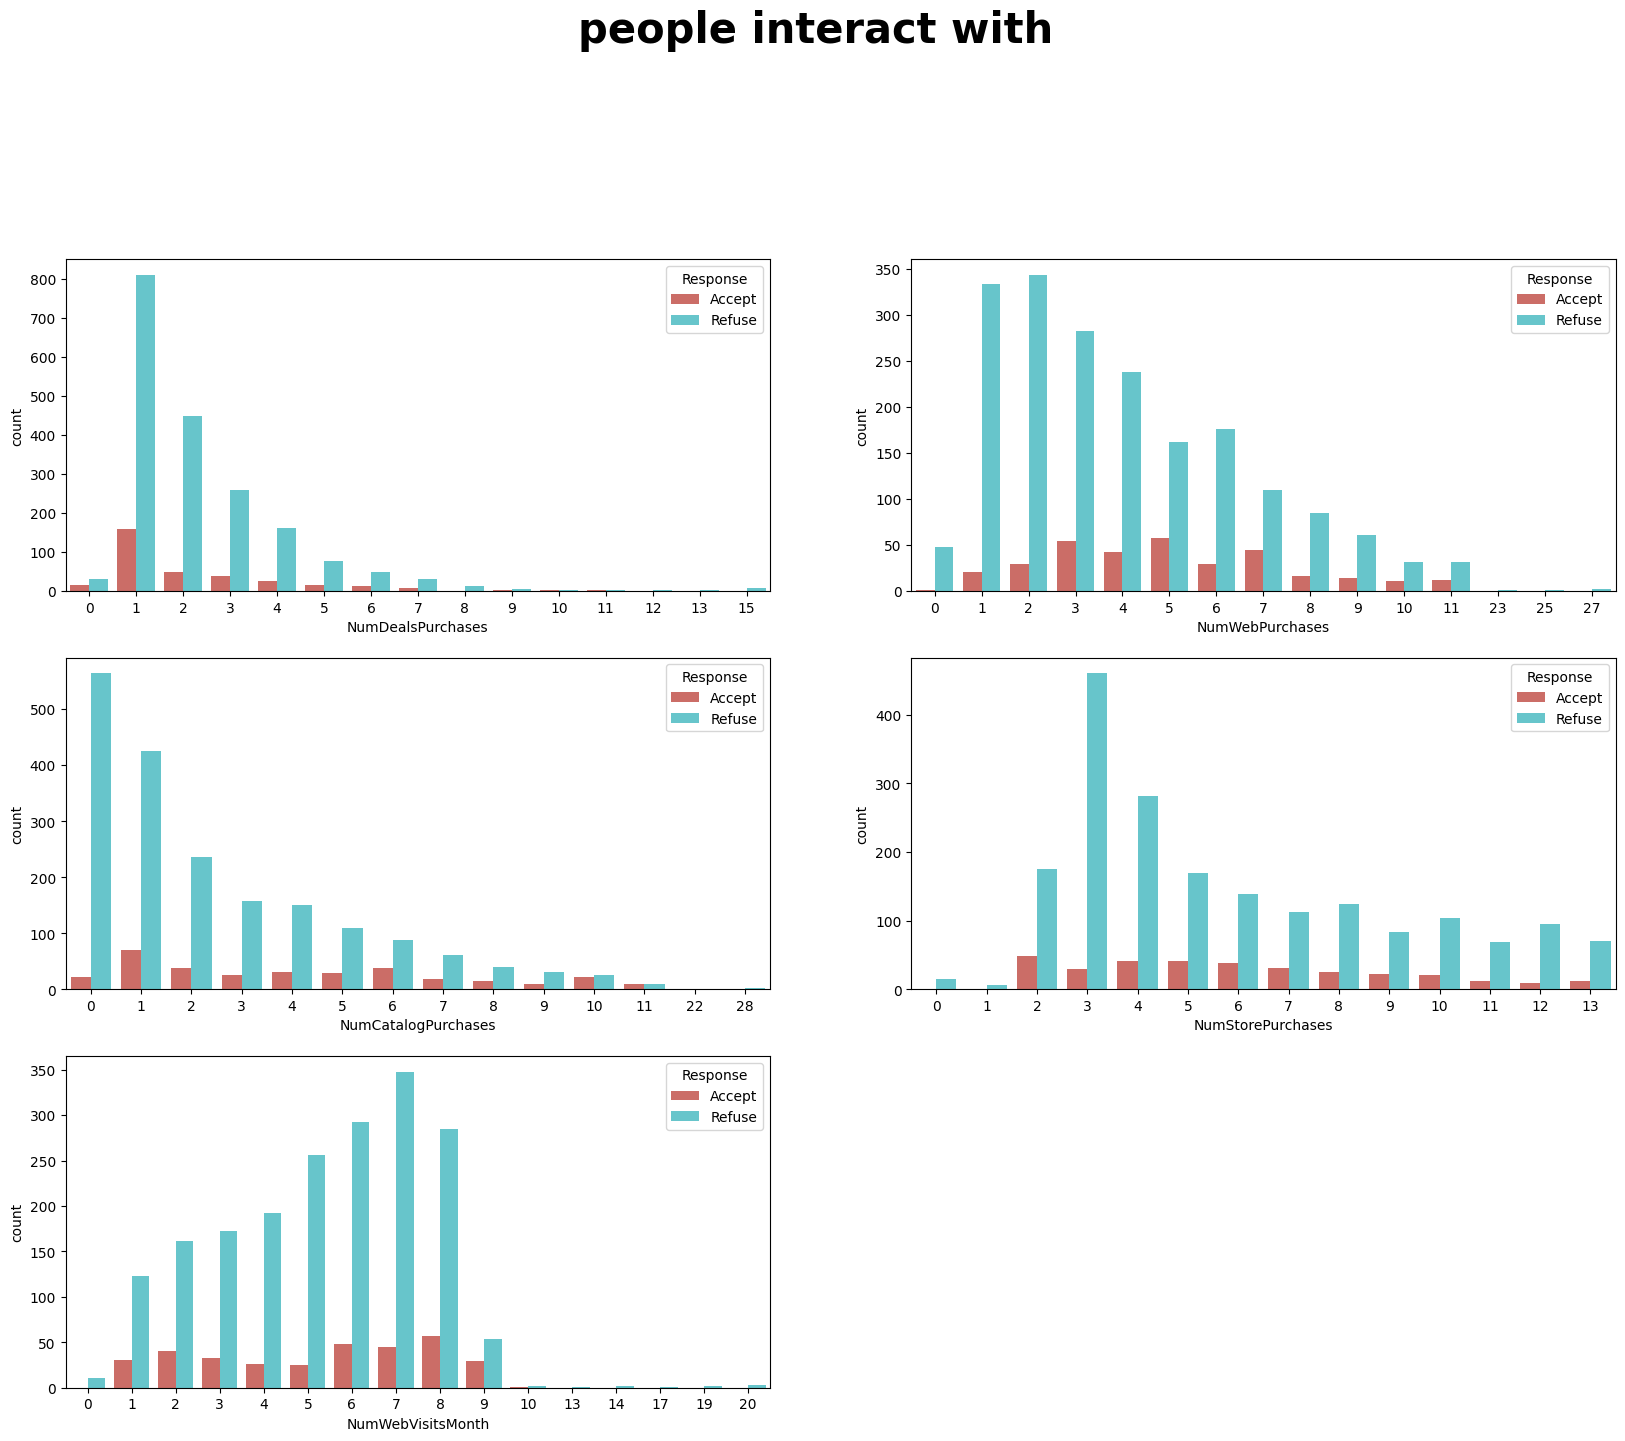

In [35]:
plt.figure(figsize = (20, 25))
plt.suptitle("people interact with",fontweight="bold", fontsize=30)
for i in range(len(featurs2_list)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = featurs2_list[i], hue = 'Response', palette = 'hls', data = data)

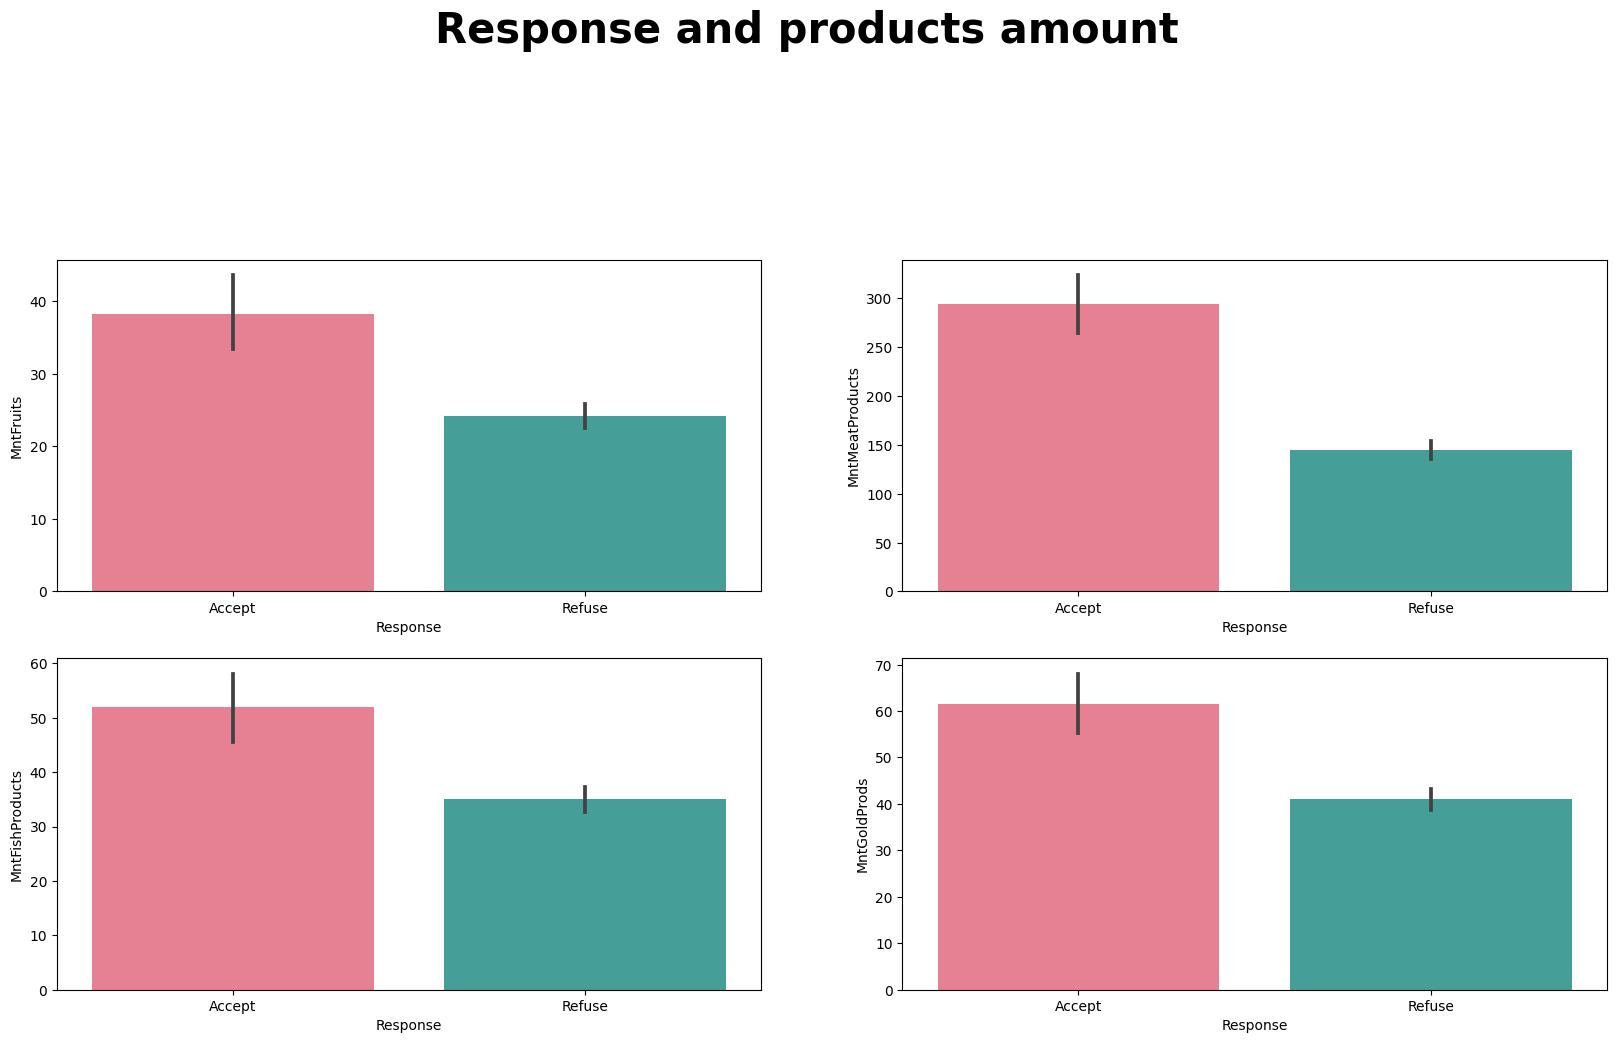

In [36]:
plt.figure(figsize = (20, 25))
plt.suptitle("Response and products amount",fontweight="bold", fontsize=30)
for i in range(len(featurs3_list)):
    plt.subplot(5,2,i+1)
    sns.barplot(y = featurs3_list[i], x = 'Response' ,  palette = 'husl', data = data)

<Axes: xlabel='Recency', ylabel='Count'>

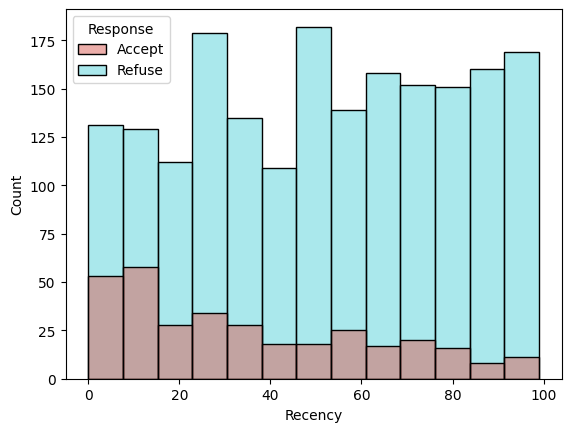

In [37]:
sns.histplot(x = 'Recency', hue = 'Response', palette = 'hls', data = data)

<Axes: xlabel='Income', ylabel='Count'>

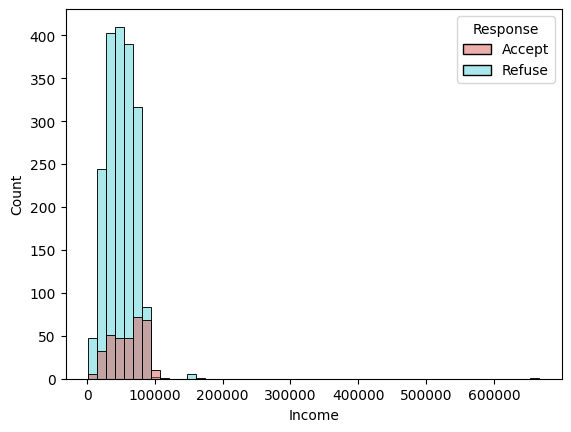

In [38]:
sns.histplot(x = 'Income', hue = 'Response', palette = 'hls',bins=50, data = data)


In [39]:
data['Age']=2023-data['Year_Birth']


In [40]:
data["Age"]

0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2240, dtype: int64

In [41]:
data[data.Age>100].Age.values

array([130, 124, 123])

<Axes: xlabel='Age', ylabel='Count'>

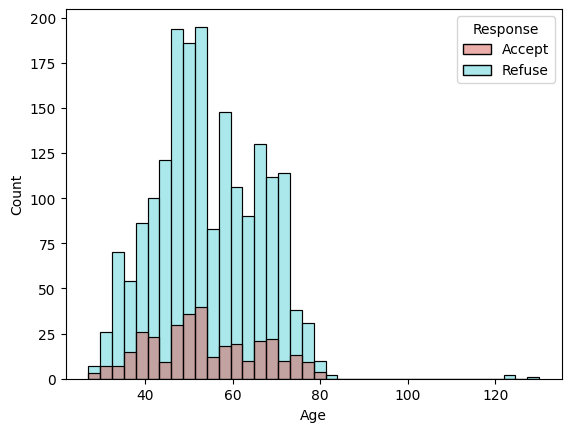

In [42]:
sns.histplot(x = 'Age', hue = 'Response', palette = 'hls', data = data)


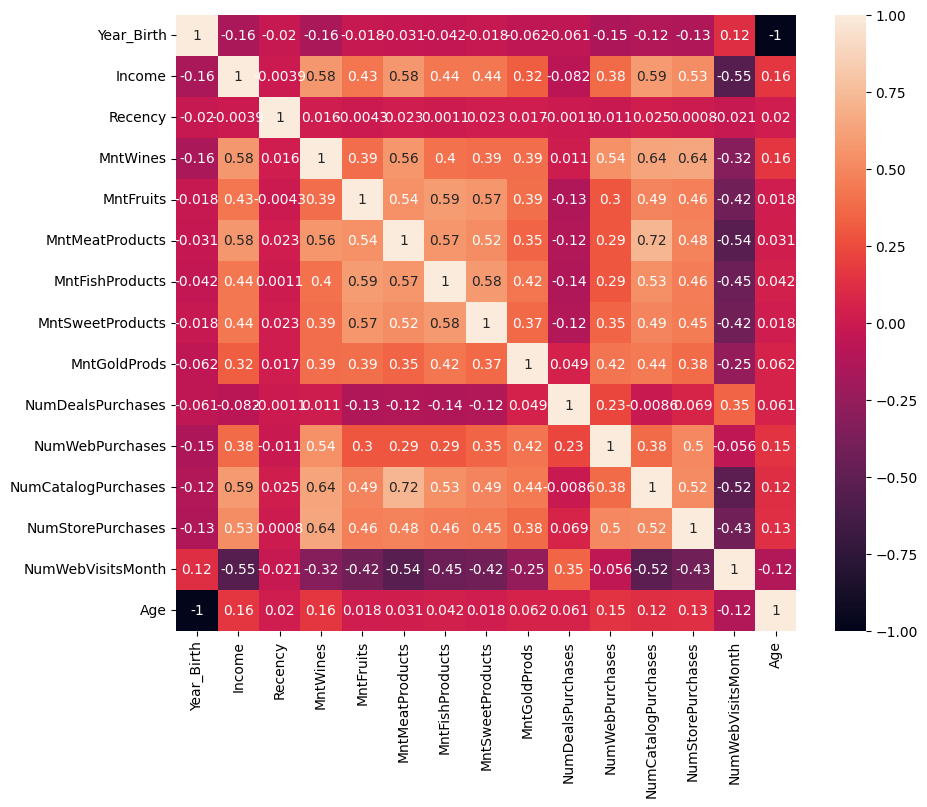

In [43]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr() , annot = True)
plt.show()

# Label ENcoding

In [44]:
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [45]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,2,1,84835.0,0,0,2,0,189,104,379,111,189,218,1,4,4,6,1,0,0,53
1,1961,2,3,57091.0,0,0,2,0,464,5,64,7,0,37,1,7,3,7,5,0,0,62
2,1958,2,2,67267.0,0,1,2,0,134,11,59,15,2,30,1,3,2,5,2,1,0,65
3,1967,2,2,32474.0,1,1,2,0,10,0,1,0,0,0,1,1,0,2,7,1,0,56
4,1989,2,3,21474.0,1,0,2,0,6,16,24,11,0,34,2,3,1,2,7,0,0,34


In [46]:
data.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int64
dtype: object

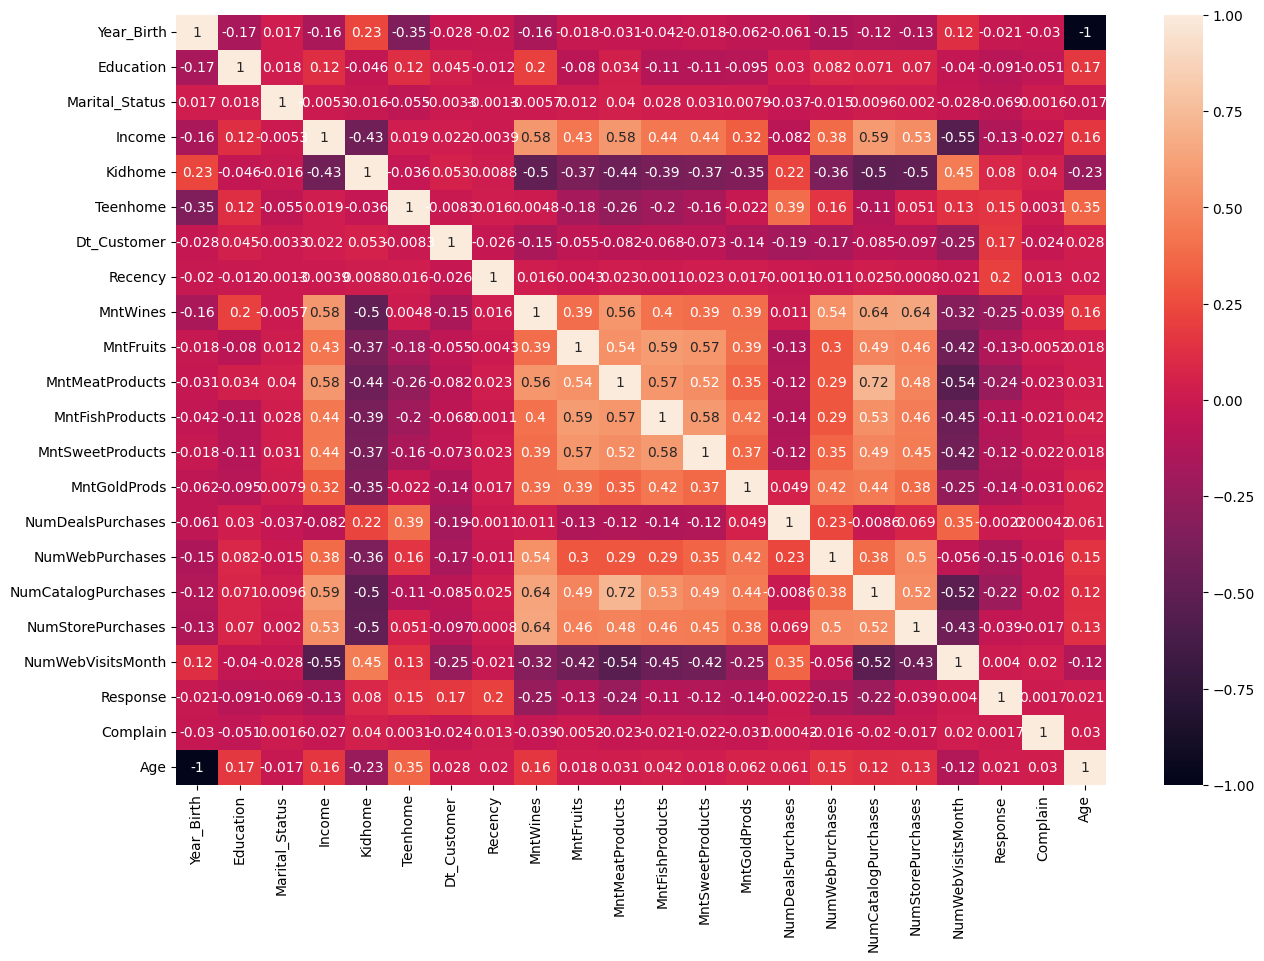

In [47]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr() , annot = True)
plt.show()

# Train - Test model


In [48]:
x,y = data.drop(["Response"], axis =1 ), data["Response"]

In [49]:
x.shape, y.shape

((2240, 21), (2240,))

In [50]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1792, 21), (448, 21), (1792,), (448,))

# Remove the Outlier from train data using Z-Score

In [52]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Year_Birth', 'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Logistic Regression Model


In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
log_reg_pred = log_reg.predict(x_test)

In [55]:
print("Accuracy Score :", round(accuracy_score(y_test, log_reg_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, log_reg_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, log_reg_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, log_reg_pred, average='weighted')))

Accuracy Score : 86.83 %
F-1 Score :  0.8445566855504741
Precision Score :  0.8440724402719652
Recall Score :  0.8683035714285714


In [56]:
params = {"penalty":["l1", "l2", "elasticnet", None],
          "dual" : [True, False],
          "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
         }
log_reg_grid = GridSearchCV(log_reg,params)
log_reg_grid.fit(x_train, y_train)
best_param_log_reg = log_reg_grid.best_params_

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was re

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/lin

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

/home/ilaf/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaf/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [57]:
best_param_log_reg

{'dual': False, 'penalty': None, 'solver': 'newton-cg'}

In [58]:
log_reg_hyper = LogisticRegression(dual = False, penalty = None, solver = "newton-cg")
log_reg_hyper.fit(x_train, y_train)
log_reg_hyper_pred = log_reg_hyper.predict(x_test)

/home/ilaf/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaf/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [59]:
print("Before hyper-parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, log_reg_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, log_reg_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, log_reg_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, log_reg_pred, average='weighted')))

print("\nAfter hyper parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, log_reg_hyper_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, log_reg_hyper_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, log_reg_hyper_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, log_reg_hyper_pred, average='weighted')))

Before hyper-parameter tuning
Accuracy Score : 86.83 %
F-1 Score :  0.8445566855504741
Precision Score :  0.8440724402719652
Recall Score :  0.8683035714285714

After hyper parameter tuning
Accuracy Score : 87.05 %
F-1 Score :  0.8546877243359656
Precision Score :  0.8510171058714748
Recall Score :  0.8705357142857143


- Hyper parameter tuning of logistic regression show a bit of better sores

# k nearest neighbour

In [60]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [61]:
print("Accuracy Score :", round(accuracy_score(y_test, knn_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, knn_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, knn_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, knn_pred, average='weighted')))

Accuracy Score : 82.81 %
F-1 Score :  0.8060783493656768
Precision Score :  0.7920442753372534
Recall Score :  0.828125


In [62]:
params = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          "weights":["uniform","distance",None],
          "algorithm":["kd_tree"]
         }
knn_grid = GridSearchCV(knn,params)
knn_grid.fit(x_train, y_train)
best_param_knn = knn_grid.best_params_

In [63]:
best_param_knn

{'algorithm': 'kd_tree', 'n_neighbors': 16, 'weights': 'distance'}

In [64]:
knn_hyper = KNeighborsClassifier(algorithm = 'kd_tree', n_neighbors = 16, weights = 'distance')
knn_hyper.fit(x_train, y_train)
knn_hyper_pred = knn_hyper.predict(x_test)

In [65]:
print("Before hyper-parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, knn_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, knn_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, knn_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, knn_pred, average='weighted')))

print("\nAfter hyper parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, knn_hyper_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, knn_hyper_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, knn_hyper_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, knn_hyper_pred, average='weighted')))

Before hyper-parameter tuning
Accuracy Score : 82.81 %
F-1 Score :  0.8060783493656768
Precision Score :  0.7920442753372534
Recall Score :  0.828125

After hyper parameter tuning
Accuracy Score : 86.38 %
F-1 Score :  0.828261975092241
Precision Score :  0.8337850221295015
Recall Score :  0.8638392857142857


- KNN algorithm show better difference in score before and after hyper parameter tuning.

# Naive Bayes Classifier

In [71]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_classifier_pred = nb_classifier.predict(x_test)

In [72]:
print("Accuracy Score :", round(accuracy_score(y_test, gnb_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, gnb_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, gnb_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, gnb_pred, average='weighted')))

Accuracy Score : 72.32 %
F-1 Score :  0.7599710546945666
Precision Score :  0.8339645717441906
Recall Score :  0.7232142857142857


In [73]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_grid = GridSearchCV(nb_classifier,params)
nb_grid.fit(x_train, y_train)
best_param_nb = nb_grid.best_params_

In [74]:
best_param_nb

{'var_smoothing': 0.0002848035868435802}

In [75]:
nb_hyper = GaussianNB(var_smoothing = 0.0002848035868435802)
nb_hyper.fit(x_train, y_train)
nb_hyper_pred = nb_hyper.predict(x_test)

In [76]:
print("Before hyper-parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, nb_classifier_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, nb_classifier_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, nb_classifier_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, nb_classifier_pred, average='weighted')))

print("\nAfter hyper parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, nb_hyper_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, nb_hyper_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, nb_hyper_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, nb_hyper_pred, average='weighted')))

Before hyper-parameter tuning
Accuracy Score : 72.32 %
F-1 Score :  0.7599710546945666
Precision Score :  0.8339645717441906
Recall Score :  0.7232142857142857

After hyper parameter tuning
Accuracy Score : 86.61 %
F-1 Score :  0.8272387758940327
Precision Score :  0.8403554970375248
Recall Score :  0.8660714285714286


- Naive bayes classifier shows significant amount of difference between scores.

# Decision Tree classifier

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

In [79]:
print("Accuracy Score :", round(accuracy_score(y_test, dtc_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, dtc_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, dtc_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, dtc_pred, average='weighted')))

Accuracy Score : 80.36 %
F-1 Score :  0.8071957423232543
Precision Score :  0.811111111111111
Recall Score :  0.8035714285714286


In [81]:
params = {'criterion': ["gini","entropy"],
          'splitter':["best", "random"] }

dtc_grid = GridSearchCV(dtc,params)
dtc_grid.fit(x_train, y_train)
best_param_dtc = dtc_grid.best_params_

In [82]:
best_param_dtc

{'criterion': 'entropy', 'splitter': 'best'}

In [83]:
dtc_hyper = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')
dtc_hyper.fit(x_train, y_train)
dtc_hyper_pred = dtc_hyper.predict(x_test)

In [84]:
print("Before hyper-parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, dtc_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, dtc_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, dtc_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, dtc_pred, average='weighted')))

print("\nAfter hyper parameter tuning")
print("Accuracy Score :", round(accuracy_score(y_test, dtc_hyper_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, dtc_hyper_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, dtc_hyper_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, dtc_hyper_pred, average='weighted')))

Before hyper-parameter tuning
Accuracy Score : 80.36 %
F-1 Score :  0.8071957423232543
Precision Score :  0.811111111111111
Recall Score :  0.8035714285714286

After hyper parameter tuning
Accuracy Score : 82.59 %
F-1 Score :  0.8222863678448887
Precision Score :  0.8190223569533915
Recall Score :  0.8258928571428571


- There is no much significant difference in score.